## Introduction

For the final project, I implemented a House price prediction algorithm. I will be demonstrating data lifecycle and pipelines, data cleaning and Processing, and Analytics. Overview of the project, I am using Google cloud to set up a virtual machine to process house price data, first step is to create a compute engine, and install software package git for source code version control and data. I will ingest data into compute engine and code which I have written to clean, transform, process, analyze and visualize data and store resulting files on cloud storage, which is a bucket, and publish cloud storage data to the web which can be accessed by the public. I am going to explain every stage data goes through and software pipelines used to handle this data objects. And in data cleaning, I am using various quality improvement techniques which are explained in detail in the coming sections. Coming to processing and analytics, I will be using preprocessing techniques before using a machine learning algorithm for the data and steps can be explained in detail in the following sections. While going through this process I prepared visualization to understand the effects of data cleaning and preprocessing. At last, I will be comparing results with using preprocessing and without using preprocessing to understand how important it is to use preprocessing techniques for data. Also, I will show an example to predict a house price for given inputs.

## Backgroud

I selected data life cycle and pipeline topic because it interests me how the data goes through from one stage to another stage and gives useful insights at the end to make critical decisions to grow business and I am also curious about software tools that are implemented in the pipeline, that’s why I took this as the main topic. Data life cycle is the different stages data goes through during its existence, Pipeline is an abstraction that describes tools and services that are applied to data objects as they do through the cycle. This we often see in all projects in general. Data cleaning is very important without that data is for no use. Using data without data cleaning is a waste of time. The other topic I chose is processing and analysis, which is crucial for any business to grow, this is critical to extract insights from data. So many companies like Netflix, Amazon emphasize creating different mind-boggling ways to process and analyze data and the reason to do this is that with processing and analyzing they can extract insights that grow their business exponentially. I found house price data helpful to demonstrate the above concepts. This data has null values, outliers, has useless data, etc. Each downside is treated in each step of the data cycle using software pipelines.

## Methodology

I am using USGS model to explain the data life cycle and pipeline. I will use following vocablory to explain this project


![title](img/usgs_model.png)

we can match between life cycle and pipeline. I am going to use these terms to explain the lifecycle and pipeline process

![title](img/lp.png)

### 1. Plan

Plan is to create a virtual machine and an instance to ingest data and python code for data cleaning, preprocessing and analysis  and display plots regarding data and interpret or predict results using machine learning algorithm 

### 2. Acquire

In this stage involve create required virtual machine instance and ingesting data into the istance and introducing data inputs

First we have to create compute engine instance with specific security permissions. Before this we need to create a vpn network for the compute engine instance. We have to configure firewall policy that can be accessible using port 22 for SSH, we configured explicitly because we are going use SSH to remotely access compute engine instance. Follow documentantion to add firewall to use ssh https://cloud.google.com/iap/docs/using-tcp-forwarding .

#### Creation of vpn network

search for VPC network as shown in fig and create with create VPC network button

![title](img/vpn1.png)

![title](img/vpn_details.png)

#### creation of Compute engine instance

Use create instance button

![title](img/create_instance.png)


instance running

![title](img/instance_running.png)

SSH into instance. we are going use SSH to remotely access compute engine instance. connect ssh by below dropdown option "open in browser window"

![title](img/open_ssh.png)

connected secure shell

![title](img/ssh_connected.png)

Now we have created a virtual machine which is compute engine instance to process house price data. Now we have to ingest the data and code from github. For that we have install the software package Git.This can be done by following below commands

- sudo apt-get update
- sudo apt-get -y -qq install git
- sudo apt-get install python-mpltoolkits.basemap
- git --version (To check whether git is installed)

![title](img/git_install.png)

### ingest data and code / Import and fetch data

Use below command to downlaod data and code from github. 

- git clone https://github.com/yaminipriyakodeboyina/Bigdata_project.git
- cd Bigdata_project
- ls -l (to see all files in the folder) 


![title](img/git_files.png)

#### Explaining files in github

- data1.csv :-The house price data is taken from https://www.kaggle.com/shree1992/housedata.
- finalproject.py:-include python code to predict house prices
- install_missing.sh:- installs missing python packages

use below command to install missing packages 
- bash install_missing.sh

install_missing.sh file contains instal commands for missing python packages

![title](img/missing_file.png)

#### Data 

Data Source: https://www.kaggle.com/shree1992/housedata.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
data=pd.read_csv('data1.csv')

In [3]:
df=data.copy()
df1=data.copy()

First 5 rows in data

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#### Column names and its data types

In [5]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

- Continuous Variables: price,bedrooms,	bathrooms,	sqft_living,	sqft_lot,	floors,	waterfront,	view,	condition,	sqft_above, sqft_basement,	yr_built,	yr_renovated
- Categorical Variables: street,	city,	statezip,	country

### 3. Process

Processing collected data to makle it ready to analyze

Data cleaning come under this step

### Data Cleaning

Data cleaning steps
- Remove duplicate or irrelevant observations
- Fix structural errors
- Filter unwanted outliers
- Handle missing data
- Validate and QA

#### Remove duplicate or irrelevant observations

Drop rows with price<=0, rows with price less than or equal to zero are irrelavant and should be removed

In [6]:
df.drop(df[df.price <= 0].index,inplace=True)

street,city,country are irrrelavant, because we are using zipcode, the former are redundant data and date cannot be processed to estimate price so we are ommiting it.

In [7]:
df.drop(['street','city','country','date'],axis=1, inplace=True)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Handle missing data

Bedroom data looks good and it is correlated with price data, so It is one of the main feature to predict price. But few rows has 0 bedrooms, these 0 bedrooms are missing data 

In [9]:
display(df[df.bedrooms == 0])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
2365,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,WA 98102
3209,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,WA 98053


It is not normal to have no bedrooms in a housse that costs 1095000.0 and 1295648.0	

bedrooms vs sqft_living

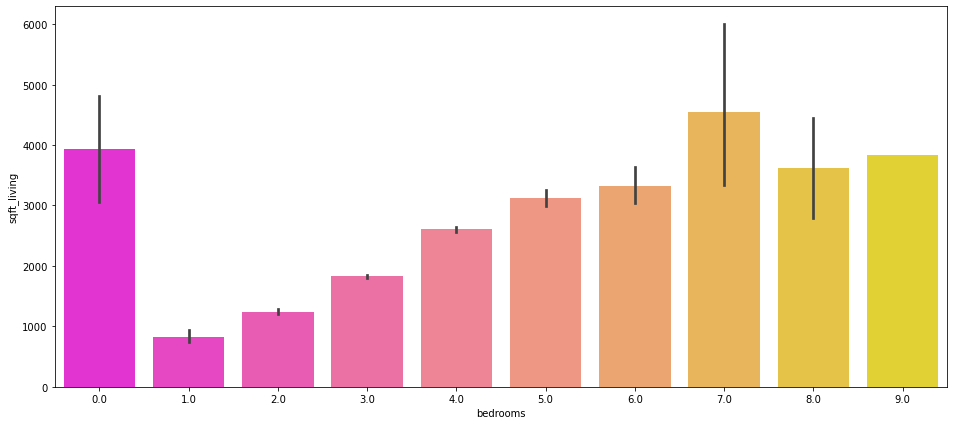

In [10]:
plt.figure(figsize=(16,7))
ax = sns.barplot(x=df['bedrooms'], y=df['sqft_living'],palette="spring")

houses which has 0 bedrooms has nearly same sqft_living as 7 bedrooms, so we will replace 0 bedrooms with 4 bedrooms. Here we are using sqft_living because sqft_living is highly correlated with price

In [11]:
df['bedrooms'].replace(to_replace = 0, value = 7, inplace = True)

Bathroom data looks good and it is correlated with price data, so It is one of the main feature to predict price. But few rows has 0 bathrooms. As it is not normal to have zero bathrooms

In [12]:
display(df[df.bathrooms == 0])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
2365,1095000.0,7.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,WA 98102
3209,1295648.0,7.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,WA 98053


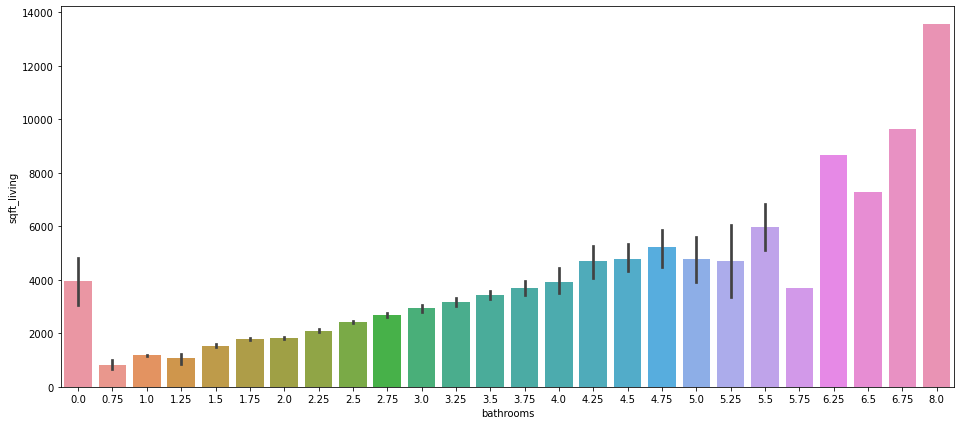

In [13]:
plt.figure(figsize=(16,7))
ax = sns.barplot(x=df['bathrooms'], y=df['sqft_living'])

same as bedrooms,houses which has 0 bathrooms has nearly same sqft_living as 4 bathrooms, so we will replace 0 bathrooms with 4 bathrooms.Here we are using sqft_living because sqft_living is highly correlated with price

In [14]:
df['bathrooms'].replace(to_replace = 0, value = 4, inplace = True)

#### Filter unwanted outliers

Text(0, 0.5, 'price')

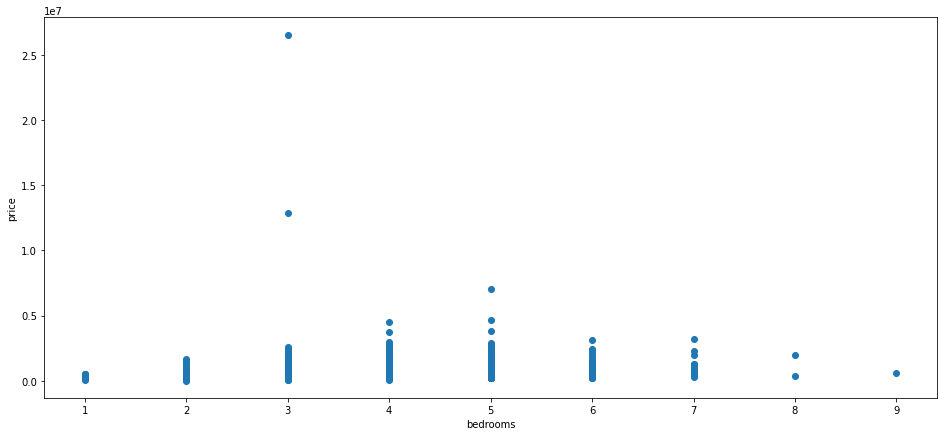

In [15]:
plt.figure(figsize=(16,7))
plt.scatter(df.bedrooms,df.price)
plt.xlabel("bedrooms")
plt.ylabel("price")

bedrooms values with more than 7 are outliers because there are few more than 7 and rare to have more than 7 bedrooms, so we make bedroom value more than 7 to 7

In [16]:
df['bedrooms'] = np.where((df.bedrooms >7 ), 7, df.bedrooms)

Text(0, 0.5, 'price')

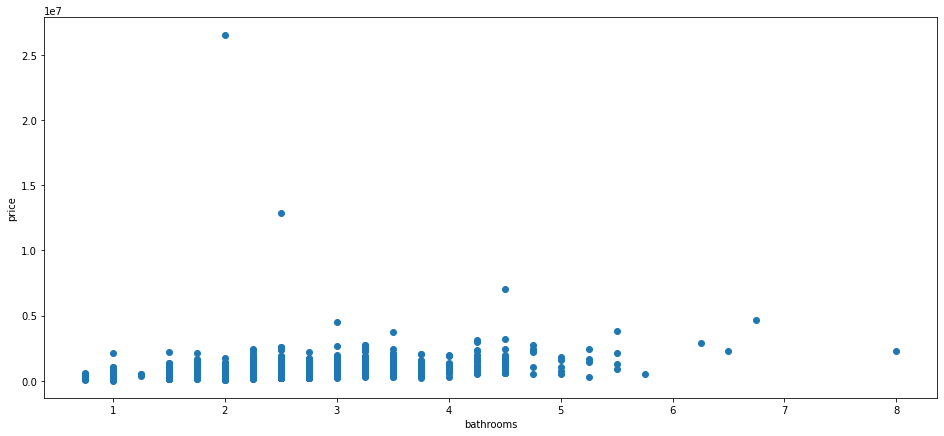

In [17]:
plt.figure(figsize=(16,7))
plt.scatter(df.bathrooms,df.price)
plt.xlabel("bathrooms")
plt.ylabel("price")

bathrooms values with more than 6 are outliers because only few have more than 6 and very rare to have more than 6 bathrooms, so we make bathrooms value more than 6 to 6

In [18]:
df['bathrooms'] = np.where((df.bathrooms >6 ), 6, df.bathrooms)

Text(0, 0.5, 'price')

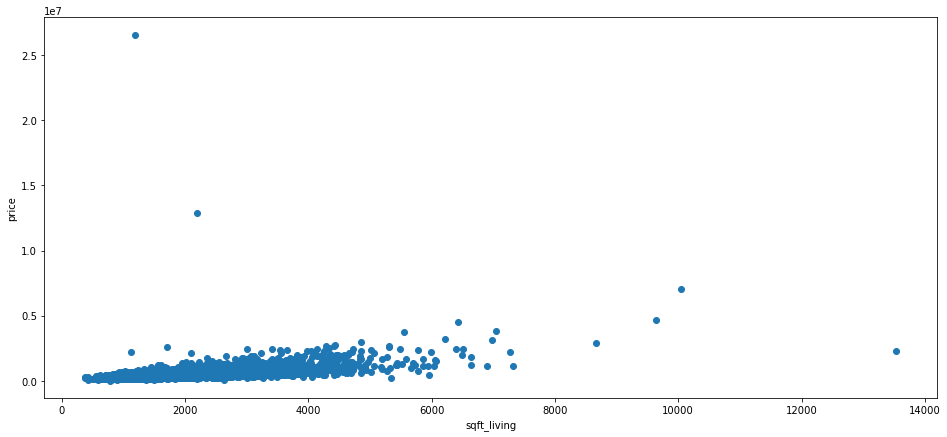

In [19]:
plt.figure(figsize=(16,7))
plt.scatter(df.sqft_living,df.price)
plt.xlabel("sqft_living")
plt.ylabel("price")

sqft_living values with more than 6000 are outliers, so we make sqft_living value more than 6000 to 6000

In [20]:
df['sqft_living'] = np.where((df.sqft_living >6000 ), 6000, df.sqft_living)

 sqft_lot vs price graph

Text(0, 0.5, 'price')

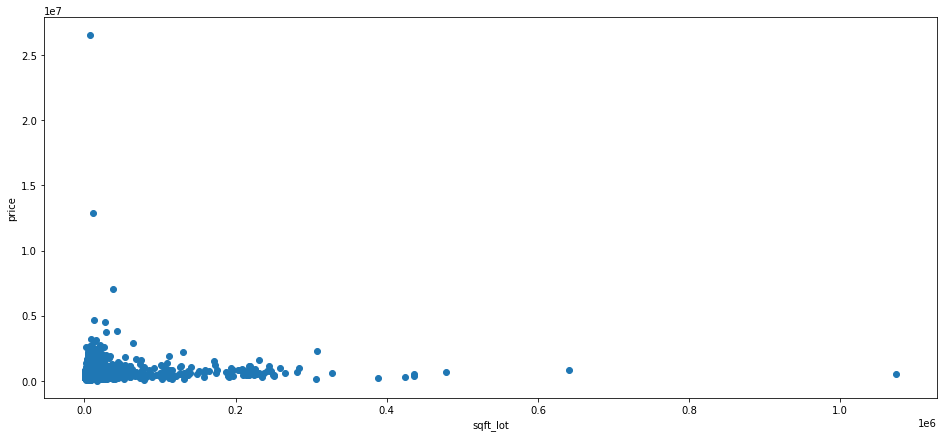

In [21]:
plt.figure(figsize=(16,7))
plt.scatter(df.sqft_lot,df.price)
plt.xlabel("sqft_lot")
plt.ylabel("price")

#### sqft_lot values with more than 300000 are outliers, so we make sqft_lot value more than 300000 to 300000

In [22]:
df['sqft_lot'] = np.where((df.sqft_lot >300000 ), 300000, df.sqft_lot)

sqft_above vs price graph

Text(0, 0.5, 'price')

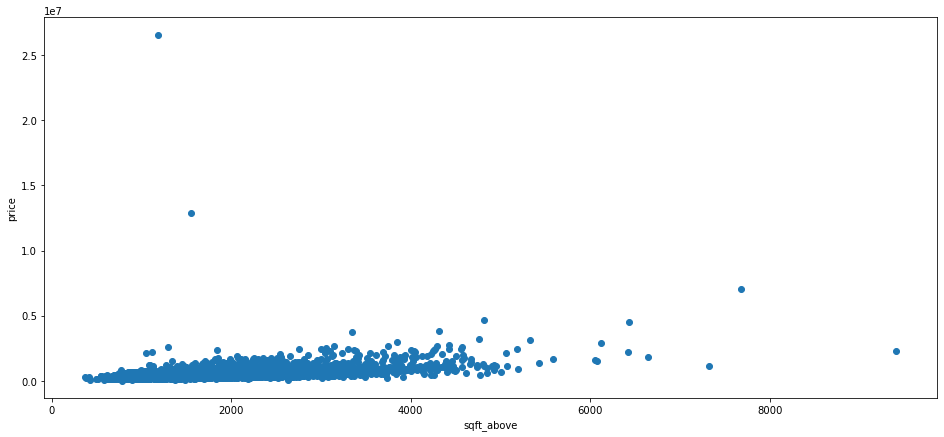

In [23]:
plt.figure(figsize=(16,7))
plt.scatter(df.sqft_above,df.price)
plt.xlabel("sqft_above")
plt.ylabel("price")

#### sqft_above values with more than 5000 are outliers, so we make sqft_above value more than 5000 to 5000

In [24]:
df['sqft_above'] = np.where((df.sqft_above >5000 ), 5000, df.sqft_above)
# display(df[df.sqft_above > 5000])

### sqft_basement vs price

Text(0, 0.5, 'price')

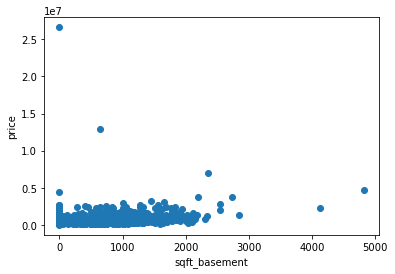

In [25]:
plt.scatter(df.sqft_basement,df.price)
plt.xlabel("sqft_basement")
plt.ylabel("price")

#### sqft_basement values with more than 2000 are outliers, so we make sqft_basement value more than 2000 to 2000

In [26]:
df['sqft_basement'] = np.where((df.sqft_basement >2000 ), 2000, df.sqft_basement)
# display(df[df.sqft_basement > 2000])

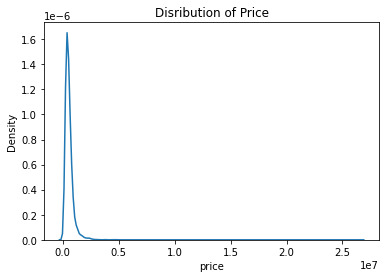

In [27]:
ax = sns.kdeplot(df['price'])
ax.set_title('Disribution of Price')
plt.show()

In [28]:
from scipy import stats
# df['price'] = df['price'].replace([data['price'][np.abs(stats.zscore(data['price'])) > 3]],np.median(df['price']))
df['price'] = np.log(df['price'])

price data is left skwed, so log transformation is applied to price column, as price column id is the target variable it will greatly affect the output, This is also a preprocessing technique.

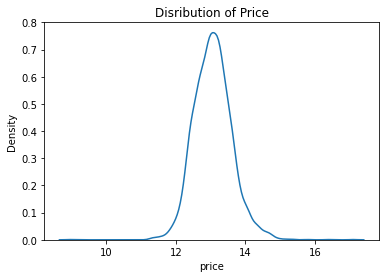

In [29]:
ax = sns.kdeplot(df['price'])
ax.set_title('Disribution of Price')
plt.show()

In [30]:
df.to_csv("cleaned_houseprice_data.csv", sep='\t')

data cleaning is not performed on df1 dataframe

In [31]:

XX = df1.drop(["price"],axis = 1)
YY = df1["price"]

### 4. Analyze

In Analyze stage, we will do preprocessing steps like OneHotEncoder for categorical variables and StandardScaler for continuous variables and also we also used validation to check our model is working properly

- OneHotEncoder for categorical variables :-
This helps to convert categorical variable to numerical value, so that categorical variable can be used in analysis.
The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array
- StandardScaler for continuous variables :-
Standardize features by removing the mean and scaling to unit variance. It helps the data to converge in less iterations

- Linear regression:- 
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

- Cross Validation:- 
Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#### LinearRegression

In [34]:


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

numeric_features =['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','view','sqft_basement','yr_built']
categorical_features  = ['statezip']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])
X = df.drop(["price"],axis = 1)
Y=df['price']
print("results after cleaning data")
print("Cross Validation for LinearRegression",cross_val_score(clf, X, Y, cv=5))
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)
clf.fit(x_train, y_train)
print("Performance score for test data",clf.score(x_test, y_test))
print("Performance score for train data",clf.score(x_train, y_train))



results after cleaning data
Cross Validation for LinearRegression [0.85064756 0.84371575 0.86595564 0.86553384 0.59448006]
Performance score for test data 0.8213787525267323
Performance score for train data 0.7902473775647755


In [35]:
# clf = LinearRegression()
print("data used here is not cleaned")
print("Cross Validation for LinearRegression",cross_val_score(clf, XX, YY, cv=5))
x_train, x_test, y_train, y_test = train_test_split(XX, YY, random_state=0)
clf.fit(x_train, y_train)
print("Performance score for test data",clf.score(x_test, y_test))
print("Performance score for train data",clf.score(x_train, y_train))

data used here is not cleaned
Cross Validation for LinearRegression [0.76924941 0.77229506 0.68399461 0.73501827 0.03391347]
Performance score for test data 0.7108396691223662
Performance score for train data 0.24705831942625622


### 5. Preserve

Create a cloud storage bucket
-   From the Navigation menu select Cloud Storage
- Choose a globally unique bucket name (but not a name you'd like to use for your own projects), then click Continue.
- You can leave it as Multi-Regional, or improve speed and reduce costs by making it Regional (choose the same region as your Compute Engine instance).
- For Choose how to control access to objects, uncheck the box for Enforce public access prevention on this bucket and select Fine-grained for Access control.
- Then, click Create.


![title](img/create_bucket1.png)

![title](img/created_bucket.png)

After creating bucket store the original and transformed house price data in cloud storage

- gsutil cp *.png *.csv gs://ykodeboy_classbucket/house_price_data/

The above command store png files and csv files in bucket

![title](img/files.png)

### 6. Publish

we can now publish the files in the bucket to web

To create a publicly accessible URL for the files, click on the earthquakes.htm file, then click the three dots at the end of the row and select Edit Permissions from the dropdown menu. In the overlay that appears, click the + Add entry button.
- Select Public for the Entity.
- Enter allUsers for the Name.
- Select Reader for the Access.
- Then click Save.

![title](img/public.png)

https://storage.googleapis.com/ykodeboy_classbucket/house_price_data/compare_features.png 

If you click on the compare_features.png image file and then on the public URL, a new tab will be opened with the following image loaded:
A feature comparison image after data cleaning

![title](img/fea.png)

## Results

We followed all data life cycle and pipelines as follows

-	Plan:- Planed the flow of the project
-	Acquire 
Create a Compute Engine instance with specific security permissions.
SSH into the instance.
Install the software package Git (for source code version control).
Ingest data into the Compute Engine instance.
-	Process
Implemented data cleaning techniques, transformed data using log transform
-	Analyze
Used preprocessing techniques like onehotencoder, standartscaler, linear regression, cross validation to train model and predict results
- Preserve
Preserved the files in bucket storage
-	Publish 
Published the files to the web

The results we got ,data_cleaned .csv, where the original data is cleaned by using different techniques 
- Remove duplicate or irrelevant observations
- Fix structural errors
- Filter unwanted outliers
- Handle missing data
- Validation

This data can be used directly by anyone to fit into thieir model, it is easy to integrate with url :-, The correlation between the features before and after cleaning can be seen by url

We used linear regression to predict the results. Below we compared the results of machine learning model with and without using data cleaning step.

Results after cleaning data are
- Cross Validation for Linear Regression [0.85064756 0.84371575 0.86595564 0.86553384 0.59448006]
- Performance score for test data 0.8213787525267323
- Performance score for train data 0.7902473775647755

Model was good on both test and train data where the performance score is around 80 %. Cross-validation is to check whether the model is working well on all data sets. All the scores in the cross-validation array are above 85% except one. The model is doing good so far.

results without cleaning data:

- Cross Validation for Linear Regression [0.76924941 0.77229506 0.68399461 0.73501827 0.03391347]
- Performance score for test data 0.7108396691223662
- Performance score for train data 0.24705831942625622


Model performance on test and train data is not good, moreover, on train data, the performance is only 24% which implies that data is underfitting. Cross-validation scores are not great when compared to former scores. In conclusion, data cleaning is a very important aspect of modeling an algorithm. All the efforts are wasted if data is not cleaned properly.

## Discussion

As we came to know from the above explanation about data life cycle and pipelines and the importance of data cleaning and analytics and preprocessing. I employed the technologies with help of course material especially the data life cycle and pipeline module and also Rent-a-VM to Process Earthquake Data also helped me in doing this project, I have learned new things while doing the project. My experience in data cleaning,  machine learning models, and also skills learned in this class while doing impact of Bigdata, processing, and analytics modules also helped me while doing this project. Difficulties I have faced are, I took more time in deciding what to do for the final project, I am not sure whatever I am doing is sufficient while creating an instance in google cloud I faced a few problems such creation of a VPN network which I have not come across the course before but the documentation helped me. I can further improve this project by importing Kaggle packages and ingesting house price data in real-time rather than downloading from Github. I can use more validations in the process stage in the data life cycle. I can use other sklearn machine learning models to make model work even better. I can use other preprocessing techniques like normalization instead of standardization and compare the results.

## Conclusion

Data life cycle and pipelines have different models, I used the USGS model, which can be DCC, DATAONE, or SEAD model. The main outcome of this project is how house price data has gone through different stages of data life cycle and pipelines, techniques used to clean data, and preprocessing techniques and packages used to create a machine learning model and predicted house price results. The main outcomes are the cleaned data is available to the public which can be used directly to analyze as it is already cleaned, predicting house prices using machine learning model, and importance of data cleaning by comparing machine learning model results with and without data cleaning. Please feel free to give feedback. I had a great learning experience while doing the project. 

## References

- Data lifecycle and pipelines module
- https://www.qwiklabs.com/focuses/1846?catalog_raAs%20we%20came%20to%20know%20from%20the%20above%20explanation%20about%20data%20life%20cycle%20and%20pipelines%20and%20the%20importance%20of%20data%20cleaning%20and%20analytics%20and%20preprocessing.%20I%20employed%20the%20technologies%20with%20help%20of%20course%20material%20especially%20the%20data%20life%20cycle%20and%20pipeline%20module%20and%20also%20Rent-a-VM%20to%20Process%20Earthquake%20Data%20(Links%20to%20an%20external%20site.)%22%20also%20helped%20me%20in%20doing%20this%20project,%20I%20have%20learned%20new%20things%20while%20doing%20the%20project.%20My%20experience%20in%20data%20cleaning,%20%20machine%20learning%20models,%20and%20also%20skills%20learned%20in%20this%20class%20while%20doing%20impact%20of%20Bigdata,%20processing,%20and%20analytics%20modules%20also%20helped%20me%20while%20doing%20this%20project.%20Difficulties%20I%20have%20faced%20are,%20I%20took%20more%20time%20in%20deciding%20what%20to%20do%20for%20the%20final%20project,%20I%20am%20not%20sure%20whatever%20I%20am%20doing%20is%20sufficient%20while%20creating%20an%20instance%20in%20google%20cloud%20I%20faced%20a%20few%20problems%20such%20creation%20of%20a%20VPN%20network%20which%20I%20have%20not%20come%20across%20the%20course%20before%20but%20the%20documentation%20helped%20me.%20I%20can%20further%20improve%20this%20project%20by%20importing%20Kaggle%20packages%20and%20ingesting%20house%20price%20data%20in%20real-time%20rather%20than%20downloading%20from%20Github.%20I%20can%20use%20more%20validations%20in%20the%20process%20stage%20in%20the%20data%20life%20cycle.%20I%20can%20use%20other%20sklearn%20machine%20learning%20models%20to%20make%20model%20work%20even%20better.%20I%20can%20use%20other%20preprocessing%20techniques%20like%20normalization%20instead%20of%20standardization%20and%20compare%20the%20results.nk=%7B%22rank%22%3A1%2C%22num_filters%22%3A0%2C%22has_search%22%3Atrue%7D&parent=catalog&search_id=7008005
- https://www.tableau.com/learn/articles/what-is-data-cleaning
- https://seaborn.pydata.org/generated/seaborn.kdeplot.html#:~:text=A%20kernel%20density%20estimate%20(KDE,in%20one%20or%20more%20dimensions.
- https://cloud.google.com/iap/docs/using-tcp-forwarding .
- https://www.kaggle.com/shree1992/housedata.